# *Importing libaries*

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px



#Data preprocessing

In [41]:
dm=pd.read_csv("clothes.csv")

In [42]:
df=dm.copy()

In [43]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [44]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [45]:
df.groupby(['Rating','Recommended IND']).agg({'Recommended IND':'count'})

Recommended IND
Rating Recommended IND                 
1      0                            826
       1                             16
2      0                           1471
       1                             94
3      0                           1682
       1                           1189
4      0                            168
       1                           4909
5      0                             25
       1                          13106

In [46]:
df=dm.drop('Unnamed: 0',axis=1)

In [47]:
df['Title'].fillna('',inplace=True)

In [48]:
df['Review Text'].fillna('',inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    23486 non-null  object
 3   Review Text              23486 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [50]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [51]:
df.groupby('Rating')['Rating'].count()

Rating
1      842
2     1565
3     2871
4     5077
5    13117
Name: Rating, dtype: int64

In [52]:
df.groupby('Recommended IND')['Recommended IND'].count()

Recommended IND
0     4172
1    19300
Name: Recommended IND, dtype: int64

In [53]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Recommended IND'] == 1]
df_minority = df[df['Recommended IND'] == 0]

desired_majority_count = 4900

# Undersample majority class to desired count
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=desired_majority_count,
                                   random_state=42)

# Combining minority class and downsampled majority class
df_bal = pd.concat([df_majority_downsampled, df_minority])


In [54]:
df_bal.groupby('Recommended IND')['Recommended IND'].count()

Recommended IND
0    4172
1    4900
Name: Recommended IND, dtype: int64

In [55]:
df_bal.groupby(['Rating','Recommended IND']).agg({'Recommended IND':'count'})

Recommended IND
Rating Recommended IND                 
1      0                            826
       1                              5
2      0                           1471
       1                             25
3      0                           1682
       1                            298
4      0                            168
       1                           1224
5      0                             25
       1                           3348

In [56]:
df.groupby(['Rating','Recommended IND']).agg({'Recommended IND':'count'})

Recommended IND
Rating Recommended IND                 
1      0                            826
       1                             16
2      0                           1471
       1                             94
3      0                           1682
       1                           1189
4      0                            168
       1                           4909
5      0                             25
       1                          13092

In [57]:
df['Rating'].value_counts()

5    13117
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [58]:
df_bal['Rating'].value_counts()

5    3373
3    1980
2    1496
4    1392
1     831
Name: Rating, dtype: int64

In [59]:
df_bal.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
12065,1080,28,Adorable dress but different than pictured,Agree with other reviewers that the dress does...,4,1,0,General,Dresses,Dresses
3554,875,58,,Beautiful lightweight cardigan. the sheerness ...,5,1,2,General Petite,Tops,Knits
9859,1078,45,"Cute, comfy romper!","Love this romper! once on, feels comfy like pj...",5,1,0,General,Dresses,Dresses
4250,1081,24,,"I really like the look of this dress, but i en...",3,1,1,General,Dresses,Dresses
9339,965,57,Great casual blazer,I'm not a blazer girl but this one is perfect ...,5,1,4,General,Jackets,Jackets


In [60]:
data=df_bal.copy()

In [61]:
data['Review']=data['Title']+' '+data['Review Text']

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 12065 to 23469
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              9072 non-null   int64 
 1   Age                      9072 non-null   int64 
 2   Title                    9072 non-null   object
 3   Review Text              9072 non-null   object
 4   Rating                   9072 non-null   int64 
 5   Recommended IND          9072 non-null   int64 
 6   Positive Feedback Count  9072 non-null   int64 
 7   Division Name            9072 non-null   object
 8   Department Name          9072 non-null   object
 9   Class Name               9072 non-null   object
 10  Review                   9072 non-null   object
dtypes: int64(5), object(6)
memory usage: 850.5+ KB


In [63]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
12065,1080,28,Adorable dress but different than pictured,Agree with other reviewers that the dress does...,4,1,0,General,Dresses,Dresses,Adorable dress but different than pictured Agr...
3554,875,58,,Beautiful lightweight cardigan. the sheerness ...,5,1,2,General Petite,Tops,Knits,Beautiful lightweight cardigan. the sheerness...
9859,1078,45,"Cute, comfy romper!","Love this romper! once on, feels comfy like pj...",5,1,0,General,Dresses,Dresses,"Cute, comfy romper! Love this romper! once on,..."
4250,1081,24,,"I really like the look of this dress, but i en...",3,1,1,General,Dresses,Dresses,"I really like the look of this dress, but i e..."
9339,965,57,Great casual blazer,I'm not a blazer girl but this one is perfect ...,5,1,4,General,Jackets,Jackets,Great casual blazer I'm not a blazer girl but ...


In [64]:
data.drop(['Review Text','Title'],inplace=True,axis=1)

In [65]:
data.drop('Positive Feedback Count',inplace=True,axis=1)

In [66]:
data.groupby(['Rating','Recommended IND']).agg({'Recommended IND':'count'})

Recommended IND
Rating Recommended IND                 
1      0                            826
       1                              5
2      0                           1471
       1                             25
3      0                           1682
       1                            298
4      0                            168
       1                           1224
5      0                             25
       1                           3348

In [67]:
df.groupby(['Rating','Recommended IND']).agg({'Recommended IND':'count'})

Recommended IND
Rating Recommended IND                 
1      0                            826
       1                             16
2      0                           1471
       1                             94
3      0                           1682
       1                           1189
4      0                            168
       1                           4909
5      0                             25
       1                          13092

In [68]:
# drop rows where rating is 4 or 5 and recommended ind column class is 0
data = data.loc[~(((data.Rating==4) | (data.Rating==5)) & (data['Recommended IND']==0))]

In [69]:
#dropping rows where rating is 1 but its recommended
data = data.loc[~(((data.Rating==1) | (data.Rating==2)) & (data['Recommended IND']==1))]

In [70]:
data.head()

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Review
12065,1080,28,4,1,General,Dresses,Dresses,Adorable dress but different than pictured Agr...
3554,875,58,5,1,General Petite,Tops,Knits,Beautiful lightweight cardigan. the sheerness...
9859,1078,45,5,1,General,Dresses,Dresses,"Cute, comfy romper! Love this romper! once on,..."
4250,1081,24,3,1,General,Dresses,Dresses,"I really like the look of this dress, but i e..."
9339,965,57,5,1,General,Jackets,Jackets,Great casual blazer I'm not a blazer girl but ...


In [71]:
data.columns = ['Clothing ID', 'Age', 'Rating', 'Recommended', 'Division Name', 'Department Name', 'Class Name', 'Review']

In [72]:
data.reset_index(drop=True, inplace=True)

In [73]:
data.groupby(['Rating','Recommended']).agg({'Recommended':'count'})

Recommended
Rating Recommended             
1      0                    826
2      0                   1471
3      0                   1682
       1                    298
4      1                   1224
5      1                   3348

In [74]:
data['Recommended'].value_counts()

1    4870
0    3979
Name: Recommended, dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8849 entries, 0 to 8848
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Clothing ID      8849 non-null   int64 
 1   Age              8849 non-null   int64 
 2   Rating           8849 non-null   int64 
 3   Recommended      8849 non-null   int64 
 4   Division Name    8849 non-null   object
 5   Department Name  8849 non-null   object
 6   Class Name       8849 non-null   object
 7   Review           8849 non-null   object
dtypes: int64(4), object(4)
memory usage: 553.2+ KB


In [76]:
import pickle
pickle.dump(data,open("clothdf","wb"))

In [2]:
import pickle
with open("clothdf", 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review
0,1080,28,4,1,General,Dresses,Dresses,Adorable dress but different than pictured Agr...
1,875,58,5,1,General Petite,Tops,Knits,Beautiful lightweight cardigan. the sheerness...
2,1078,45,5,1,General,Dresses,Dresses,"Cute, comfy romper! Love this romper! once on,..."
3,1081,24,3,1,General,Dresses,Dresses,"I really like the look of this dress, but i e..."
4,965,57,5,1,General,Jackets,Jackets,Great casual blazer I'm not a blazer girl but ...


# Data Visualization


In [77]:
# Calculate average ratings by Department, Class, and Division
avg_ratings_dept = data.groupby('Department Name')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
avg_ratings_class = data.groupby('Class Name')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
avg_ratings_division = data.groupby('Division Name')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)

# Initialize the initial column to be displayed
initial_column = 'Department Name'
initial_data = avg_ratings_dept

# Create a bar chart using Plotly
fig = px.bar(
    initial_data,
    x=initial_data[initial_column],
    y='Rating',
    color='Rating',
    color_continuous_scale='sunset',
    title=f'Average Ratings by {initial_column}'
)

# Update layout
fig.update_layout(
    xaxis_title=initial_column,
    yaxis_title='Average Rating',
    plot_bgcolor='white',
)

fig.update_layout(barmode='group')

# Define columns to switch between
columns = ['Department Name', 'Class Name', 'Division Name']
buttons = []

# Add buttons for each column
for column in columns:
    if column == 'Department Name':
        dp = avg_ratings_dept
    elif column == 'Division Name':
        dp = avg_ratings_division
    else:
        dp = avg_ratings_class

    button = dict(
        label=column,
        method='update',
        args=[
            {'x': [dp[column]], 'y': [dp['Rating']], 'marker.color': [dp['Rating']]},
            {'title': f'Average Ratings by {column}',
             'xaxis': {'title': column},
             'coloraxis': {'colorbar': {'title': 'Rating'}, 'colorscale': 'sunset'}}
        ]
    )
    buttons.append(button)

# Add buttons to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True
        )
    ]
)

fig.show()

In [78]:
# Calculate value counts for each column
value_counts_dept = data['Department Name'].value_counts().reset_index()
value_counts_class = data['Class Name'].value_counts().reset_index()
value_counts_division = data['Division Name'].value_counts().reset_index()

# Rename columns for plotting
value_counts_dept.columns = ['Name', 'Count']
value_counts_class.columns = ['Name', 'Count']
value_counts_division.columns = ['Name', 'Count']

# Initialize the initial column to be displayed
initial_column = 'Department Name'
initial_data = value_counts_dept

# Create a bar chart using Plotly
fig = px.bar(
    initial_data,
    x='Name',
    y='Count',
    color='Count',
    color_continuous_scale='Inferno',
    title=f'Value Counts of {initial_column}'
)

# Update layout
fig.update_layout(
    xaxis_title=initial_column,
    yaxis_title='Count',
    plot_bgcolor='white',
)

fig.update_layout(barmode='group')

# Define columns to switch between
columns = ['Department Name', 'Class Name', 'Division Name']
buttons = []

# Add buttons for each column
for column in columns:
    if column == 'Department Name':
        dp = value_counts_dept
    elif column == 'Division Name':
        dp = value_counts_division
    else:
        dp = value_counts_class

    button = dict(
        label=column,
        method='update',
        args=[
            {'x': [dp['Name']], 'y': [dp['Count']], 'marker.color': [dp['Count']], 'marker.colorscale': 'Inferno'},
            {'title': f'Value Counts of {column}',
             'xaxis': {'title': column},
             }
        ]
    )
    buttons.append(button)

# Add buttons to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True
        )
    ]
)

fig.show()

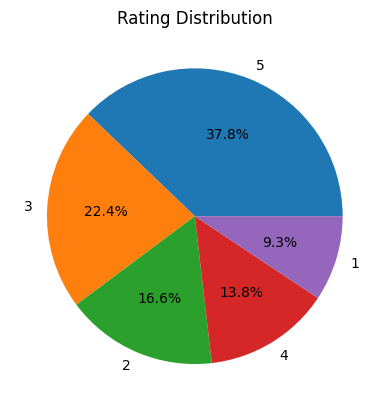

In [79]:

# Calculate the value counts of each category
Rating_counts = data['Rating'].value_counts()

# Calculate the percentage for each category
Rating_percentages = Rating_counts / len(df) * 100

# Create a pie chart
plt.pie(Rating_percentages, labels=Rating_percentages.index, autopct='%1.1f%%')

# Set plot title
plt.title('Rating Distribution')

# Display the plot
plt.show()


C:\Users\Furqan Ahmed\AppData\Local\Temp\ipykernel_7244\3495404909.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




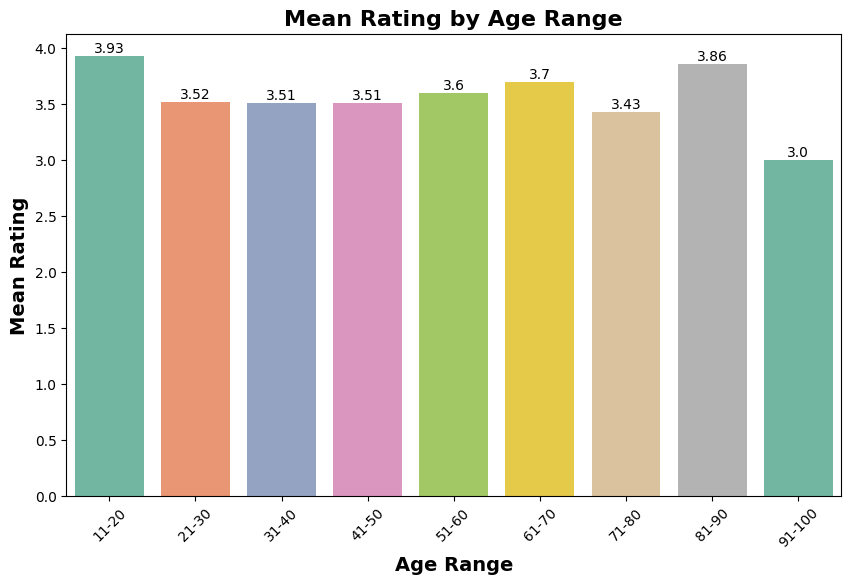

In [80]:
# bar plot of mean rating by age range

# Define the age ranges
age_ranges = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Categorize the age column into age ranges
data['Age Range'] = pd.cut(data['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=age_ranges)

# Calculate the mean rating for each age range
mean_ratings = data.groupby('Age Range')['Rating'].mean().round(2)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_ratings.index, y=mean_ratings.values, palette='Set2')

# Add data labels to the bars
for i, v in enumerate(mean_ratings.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Set plot title and labels
plt.title('Mean Rating by Age Range', fontweight='bold', fontsize=16)
plt.xlabel('Age Range', fontweight='bold', fontsize=14)
plt.ylabel('Mean Rating', fontweight='bold', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [81]:
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame containing the relevant information

# Define a function to create the pie chart with counts
def create_pie_chart(age_range):
    age_range_data = data[data['Age Range'] == age_range]
    counts = age_range_data['Recommended'].value_counts()
    percentages = counts / counts.sum() * 100
    return go.Figure(
        data=[
            go.Pie(
                labels=percentages.index,
                values=percentages,
                hoverinfo='label+percent+text',
                textinfo='label+percent+text',
                text=[f"Count: {count}" for count in counts]
            )
        ],
        layout_title_text=f"Recommended Distribution for Age Range: {age_range}",
        layout_showlegend=True,
        layout_legend_title='Recommended'
    )

# Create the initial pie chart
initial_age_range = data['Age Range'].unique()[0]
fig = create_pie_chart(initial_age_range)

# Define the age ranges and buttons, ensuring sorted order
age_ranges = sorted(data['Age Range'].unique())

buttons = []

# Add buttons for each age range
for age_range in age_ranges:
    button = dict(
        label=age_range,
        method='update',
        args=[
            {
                'values': [create_pie_chart(age_range)['data'][0]['values']],
                'labels': [create_pie_chart(age_range)['data'][0]['labels']],
                'text': [create_pie_chart(age_range)['data'][0]['text']]
            },
            {
                'title': f"Recommended Distribution for Age Range: {age_range}"
            }
        ]
    )
    buttons.append(button)

# Add buttons to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True
        )
    ]
)

fig.show()


# NLP

In [82]:
data[data['Rating']==3].sample(3)

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range
8235,307,35,3,0,Initmates,Intimate,Lounge,It's okay I've noticed this sports bra several...,31-40
8234,829,59,3,0,General Petite,Tops,Blouses,"Skylar buttondown The fit is slightly loose, b...",51-60
6527,1089,31,3,0,General,Dresses,Dresses,"Runs big!! I am pretty standard size 8, 36c, 5...",31-40


In [83]:
data[data['Review']==' ']

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range
60,927,60,5,1,General,Tops,Sweaters,,51-60
64,829,36,4,1,General,Tops,Blouses,,31-40
66,868,67,5,1,General,Tops,Knits,,61-70
87,1020,30,4,1,General,Bottoms,Skirts,,21-30
112,731,30,5,1,Initmates,Intimate,Lounge,,21-30
...,...,...,...,...,...,...,...,...,...
8427,1078,53,1,0,General Petite,Dresses,Dresses,,51-60
8589,833,36,3,0,General,Tops,Blouses,,31-40
8626,717,47,2,0,General,Bottoms,Shorts,,41-50
8672,259,35,1,0,Initmates,Intimate,Sleep,,31-40


In [84]:
data.drop(data[data['Review']==' '].index,inplace=True)

In [85]:
data.reset_index(drop=True, inplace=True)

In [86]:
negrev=data[data['Recommended']==0]
posrev=data[data['Recommended']==1]

In [87]:
print(f"positive reviews:{len(posrev)}\nnegative reviews::{len(negrev)}")

positive reviews:4663
negative reviews::3914


In [88]:
data.sample()

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range
1878,1094,67,5,1,General Petite,Dresses,Dresses,Love it! I was a little hesitant to order this...,61-70


In [89]:
import re

def remove_punctuation(text):
    # Define the pattern to match punctuation
    pattern = r'[^\w\s]'  # Matches any non-word (alphanumeric) or non-whitespace character

    # Use re.sub() to replace punctuation with empty string
    text_no_punctuation = re.sub(pattern, '', text)

    return text_no_punctuation


In [90]:
data['Cleaned_Review'] = data['Review'].apply(remove_punctuation)


In [91]:
data[['Review','Cleaned_Review']]

,Review,Cleaned_Review
0,Adorable dress but different than pictured Agr...,Adorable dress but different than pictured Agr...
1,Beautiful lightweight cardigan. the sheerness...,Beautiful lightweight cardigan the sheerness ...
2,"Cute, comfy romper! Love this romper! once on,...",Cute comfy romper Love this romper once on fee...
3,"I really like the look of this dress, but i e...",I really like the look of this dress but i en...
4,Great casual blazer I'm not a blazer girl but ...,Great casual blazer Im not a blazer girl but t...
...,...,...
8572,Not for me I tried these on because the color ...,Not for me I tried these on because the color ...
8573,I wanted to love this jacket. so soft and gre...,I wanted to love this jacket so soft and grea...
8574,Such high hopes! I purchased this for a very g...,Such high hopes I purchased this for a very go...
8575,Unflattering I was surprised at the positive r...,Unflattering I was surprised at the positive r...


In [92]:
# Adjust display settings to show full content of 'Cleaned_Review'
pd.options.display.max_colwidth = None

In [93]:
s=data.sample(3)
s[['Cleaned_Review']]


,Cleaned_Review
5969,Very straight I wanted this dress to work so badly but if you have any chest or any hips this wont work for you i tried in petites and regular and it just didnt work at all
2846,Unique coat Love the unique look of this coat living in the northeast during cold weather i wanted something warm that wasnt your runofthemill wool coat i agree with the other reviews about the somewhat bulky nature of the coat but im not wearing a coat of this nature to look thin im fairly thin 54 102 i know im not bulky so i didnt care if the coat made me look heavier than i am its a winter coat get over yourself no one really cares how much you weigh so if you can get past tha
7806,Terrible fabric The good the sloths are cute because sloths are always cute \r\n\r\nnow the bad the material is wretched it feels damp even when its not its see through and unlined its scratchy and wrinkly and though the cut of the dress would be fine the fabric is so limp that the highlow hem looks more like a tail \r\n\r\ni wanted to like this but charging nearly 200 dollars for a see through piece of awful fabric with a passable cut was simple not acceptable i returned it as fast as i possibly c


In [94]:
def handle_not(text):
      # Replace 'not' followed by any word with combined tokens
    text = re.sub(r'not\s+(\w+)', lambda x: f'not_{x.group(1)}', text)
    text = re.sub(r'didnt\s+(\w+)', lambda x: f'didnt_{x.group(1)}', text)
    text = re.sub(r'dont\s+(\w+)', lambda x: f'dont_{x.group(1)}', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)


In [95]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Furqan
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [97]:
cleaned_stop = [remove_punctuation(word) for word in stop]
print(cleaned_stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [98]:
word_tbr=['ain', 'aren', 'arent', 'couldn', 'couldnt', 'didn', 'didnt', 'doesn', 'doesnt', 'hadn', 'hadnt', 'hasn', 'hasnt', 'haven', 'havent', 'isn', 'isnt', 'ma', 'mightn', 'mightnt', 'mustn', 'mustnt', 'needn', 'neednt', 'shan', 'shant', 'shouldn', 'shouldnt', 'wasn', 'wasnt', 'weren', 'werent', 'won', 'wont', 'wouldn', 'wouldnt','dont','no', 'nor', 'not']

In [99]:
fin_stop = [word for word in cleaned_stop if word not in word_tbr]

In [100]:
data.head()

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range,Cleaned_Review
0,1080,28,4,1,General,Dresses,Dresses,Adorable dress but different than pictured Agree with other reviewers that the dress doesn't look like the picture so retailerpligie should really change it out. however i'm keeping the dress since it does look cute on. definitely more yellow in it than you can see.,21-30,Adorable dress but different than pictured Agree with other reviewers that the dress doesnt look like the picture so retailerpligie should really change it out however im keeping the dress since it does look cute on definitely more yellow in it than you can see
1,875,58,5,1,General Petite,Tops,Knits,Beautiful lightweight cardigan. the sheerness is really pretty. ordered one for my sister too!,51-60,Beautiful lightweight cardigan the sheerness is really pretty ordered one for my sister too
2,1078,45,5,1,General,Dresses,Dresses,"Cute, comfy romper! Love this romper! once on, feels comfy like pjs but looks put together. i find bending forward at the waist helps to get it off and on. tiny complaint is that the top snap shows, even when closed. that is minor. the rest is all good.",41-50,Cute comfy romper Love this romper once on feels comfy like pjs but looks put together i find bending forward at the waist helps to get it off and on tiny complaint is that the top snap shows even when closed that is minor the rest is all good
3,1081,24,3,1,General,Dresses,Dresses,"I really like the look of this dress, but i ended up returning it because it was too short. the shoulder area was also too big on me.",21-30,I really like the look of this dress but i ended up returning it because it was too short the shoulder area was also too big on me
4,965,57,5,1,General,Jackets,Jackets,Great casual blazer I'm not a blazer girl but this one is perfect in the sense that it's not overly structured and stiff. it is really soft and comfortable but still holds it's shape. i am planning to wear it with a tee shirt and denim or even some leather leggings (pilcro).i can see this being dressed up for work or church. a great piece for your wardrobe. i could have taken a small but decided on the medium in case i wore something a little thicker underneath.,51-60,Great casual blazer Im not a blazer girl but this one is perfect in the sense that its not overly structured and stiff it is really soft and comfortable but still holds its shape i am planning to wear it with a tee shirt and denim or even some leather leggings pilcroi can see this being dressed up for work or church a great piece for your wardrobe i could have taken a small but decided on the medium in case i wore something a little thicker underneath


In [101]:
clothes_list =['dress', 'top','pant','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear','pant','denim','legging','blouse']

In [102]:
def remove_words(review):
    words = review.split()  # Split the review into words
    cleaned_words = [word for word in words if word.lower() not in clothes_list]  # Filter out words not in the list

    cleaned_review = ' '.join(cleaned_words)  # Join the cleaned words back into a review
    return cleaned_review

data['CleanedReview'] = data['Cleaned_Review'].apply(remove_words)

In [103]:
data.head()

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range,Cleaned_Review,CleanedReview
0,1080,28,4,1,General,Dresses,Dresses,Adorable dress but different than pictured Agree with other reviewers that the dress doesn't look like the picture so retailerpligie should really change it out. however i'm keeping the dress since it does look cute on. definitely more yellow in it than you can see.,21-30,Adorable dress but different than pictured Agree with other reviewers that the dress doesnt look like the picture so retailerpligie should really change it out however im keeping the dress since it does look cute on definitely more yellow in it than you can see,Adorable but different than pictured Agree with other reviewers that the doesnt look like the picture so retailerpligie should really change it out however im keeping the since it does look cute on definitely more yellow in it than you can see
1,875,58,5,1,General Petite,Tops,Knits,Beautiful lightweight cardigan. the sheerness is really pretty. ordered one for my sister too!,51-60,Beautiful lightweight cardigan the sheerness is really pretty ordered one for my sister too,Beautiful lightweight cardigan the sheerness is really pretty ordered one for my sister too
2,1078,45,5,1,General,Dresses,Dresses,"Cute, comfy romper! Love this romper! once on, feels comfy like pjs but looks put together. i find bending forward at the waist helps to get it off and on. tiny complaint is that the top snap shows, even when closed. that is minor. the rest is all good.",41-50,Cute comfy romper Love this romper once on feels comfy like pjs but looks put together i find bending forward at the waist helps to get it off and on tiny complaint is that the top snap shows even when closed that is minor the rest is all good,Cute comfy romper Love this romper once on feels comfy like pjs but looks put together i find bending forward at the waist helps to get it off and on tiny complaint is that the snap shows even when closed that is minor the rest is all good
3,1081,24,3,1,General,Dresses,Dresses,"I really like the look of this dress, but i ended up returning it because it was too short. the shoulder area was also too big on me.",21-30,I really like the look of this dress but i ended up returning it because it was too short the shoulder area was also too big on me,I really like the look of this but i ended up returning it because it was too short the shoulder area was also too big on me
4,965,57,5,1,General,Jackets,Jackets,Great casual blazer I'm not a blazer girl but this one is perfect in the sense that it's not overly structured and stiff. it is really soft and comfortable but still holds it's shape. i am planning to wear it with a tee shirt and denim or even some leather leggings (pilcro).i can see this being dressed up for work or church. a great piece for your wardrobe. i could have taken a small but decided on the medium in case i wore something a little thicker underneath.,51-60,Great casual blazer Im not a blazer girl but this one is perfect in the sense that its not overly structured and stiff it is really soft and comfortable but still holds its shape i am planning to wear it with a tee shirt and denim or even some leather leggings pilcroi can see this being dressed up for work or church a great piece for your wardrobe i could have taken a small but decided on the medium in case i wore something a little thicker underneath,Great casual blazer Im not a blazer girl but this one is perfect in the sense that its not overly structured and stiff it is really soft and comfortable but still holds its shape i am planning to it with a tee and or even some leather leggings pilcroi can see this being dressed up for work or church a great piece for your wardrobe i could have taken a small but decided on the medium in case i wore something a little thicker underneath


In [104]:
df.reset_index(drop=True, inplace=True)


In [105]:
rating_labels = {
    1: 'Very Poor',
    2: 'Poor',
    3: 'Average',
    4: 'Good',
    5: 'Excellent'
}
data['Rating'] = data['Rating'].map(rating_labels)

data.sample(3)

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range,Cleaned_Review,CleanedReview
5184,862,68,Very Poor,0,General,Tops,Knits,Will never be the same after washing Bought two of these because i loved the way they fit off of the rack. washed them according to directions and they were ruined. the material shrank up making the shirt short and boxy and the side panels ended up being rippled. definitely going to try to return these.,61-70,Will never be the same after washing Bought two of these because i loved the way they fit off of the rack washed them according to directions and they were ruined the material shrank up making the shirt short and boxy and the side panels ended up being rippled definitely going to try to return these,Will never be the same after washing Bought two of these because i loved the way they fit off of the rack washed them according to directions and they were ruined the shrank up making the short and boxy and the side panels ended up being rippled definitely going to try to return these
2845,1078,32,Excellent,1,General,Dresses,Dresses,"Love this I purchased this in the ping/orange color. i am 5""8 and 155lbs, the medium fit perfectly. very soft texture with a nice flow. will be purchasing in other colors.",31-40,Love this I purchased this in the pingorange color i am 58 and 155lbs the medium fit perfectly very soft texture with a nice flow will be purchasing in other colors,Love this I purchased this in the pingorange i am 58 and 155lbs the medium fit perfectly very soft texture with a nice flow will be purchasing in other colors
3474,841,63,Good,1,General Petite,Tops,Blouses,"Beautiful top, worth the necessary tailoring The beautiful bold print drew me to this top and it did not disappoint upon receipt. however, the bottom ruffle belled so far out on each side that it was laughable! the actual fit is nothing like the picture; clearly the model's arms are placed in front of all the extra fabric to hold the ruffle back.\r\nhowever, the fabric is beautiful, the fit was perfect (size 2, 5'4"", 106 lbs.), the quality is great and i love the print so i decided to take it to my tailor to ""sew away"" the ""wings"" on both si",61-70,Beautiful top worth the necessary tailoring The beautiful bold print drew me to this top and it did not disappoint upon receipt however the bottom ruffle belled so far out on each side that it was laughable the actual fit is nothing like the picture clearly the models arms are placed in front of all the extra fabric to hold the ruffle back\r\nhowever the fabric is beautiful the fit was perfect size 2 54 106 lbs the quality is great and i love the print so i decided to take it to my tailor to sew away the wings on both si,Beautiful worth the necessary tailoring The beautiful bold print drew me to this and it did not disappoint upon receipt however the bottom ruffle belled so far out on each side that it was laughable the actual fit is nothing like the picture clearly the models arms are placed in front of all the extra to hold the ruffle back however the is beautiful the fit was perfect size 2 54 106 lbs the quality is great and i love the print so i decided to take it to my tailor to sew away the wings on both si


In [106]:
data['combined_review']=data.iloc[:,[2,10]].apply(lambda x: ' '.join(x), axis=1)

In [107]:
data.drop(['Review','Cleaned_Review'],axis=1,inplace=True)

In [108]:
data.head(3)

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Age Range,CleanedReview,combined_review
0,1080,28,Good,1,General,Dresses,Dresses,21-30,Adorable but different than pictured Agree with other reviewers that the doesnt look like the picture so retailerpligie should really change it out however im keeping the since it does look cute on definitely more yellow in it than you can see,Good Adorable but different than pictured Agree with other reviewers that the doesnt look like the picture so retailerpligie should really change it out however im keeping the since it does look cute on definitely more yellow in it than you can see
1,875,58,Excellent,1,General Petite,Tops,Knits,51-60,Beautiful lightweight cardigan the sheerness is really pretty ordered one for my sister too,Excellent Beautiful lightweight cardigan the sheerness is really pretty ordered one for my sister too
2,1078,45,Excellent,1,General,Dresses,Dresses,41-50,Cute comfy romper Love this romper once on feels comfy like pjs but looks put together i find bending forward at the waist helps to get it off and on tiny complaint is that the snap shows even when closed that is minor the rest is all good,Excellent Cute comfy romper Love this romper once on feels comfy like pjs but looks put together i find bending forward at the waist helps to get it off and on tiny complaint is that the snap shows even when closed that is minor the rest is all good


In [109]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()
corpus = []

for i in range(len(df)):
    try:
        review = re.sub('[^a-zA-Z]', ' ', data['combined_review'][i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in fin_stop]
        review = ' '.join(review)
        corpus.append(review)
    except KeyError:
        continue


In [110]:
corpus[33:37]

['excel flatteringli cute wish front waistband highwaist pant darlingflatt vintag yet ontrend made high qualiti tailor pound bought size perfect fit',
 'excel perfect incred saw sale girl wear local retail love bought navi gorgeou person bright vibrant color c bra inch waist quit big waist kept anyway xs sold got taken bit wore vacat mexico definit turn head think buy wont regret',
 'excel love pant pair charli one thing realli like consist fit pair orang gray bought normal stretch littl snug tri dont size definit recommend pant',
 'excel gorgeou purchas purpl much prettier person pictur rich vibrant usual larg xl need larg combin fabric make special sheer bell sleev realli set felt flow perfectli not full fall retail top full around littl broad side perhap someon smaller might overbeari']

In [111]:
data.drop(['Age Range','CleanedReview'],axis=1,inplace=True)


In [112]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Furqan
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [113]:
from nltk.tokenize import word_tokenize
def apply_stop(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word.lower() not in fin_stop]
    text = " ".join(tokens)

    return text

data['Processed_Review'] = data['combined_review'].apply(apply_stop)

data[['combined_review', 'Processed_Review']]

,combined_review,Processed_Review
0,Good Adorable but different than pictured Agree with other reviewers that the doesnt look like the picture so retailerpligie should really change it out however im keeping the since it does look cute on definitely more yellow in it than you can see,Good Adorable different pictured Agree reviewers doesnt look like picture retailerpligie really change however im keeping since look cute definitely yellow see
1,Excellent Beautiful lightweight cardigan the sheerness is really pretty ordered one for my sister too,Excellent Beautiful lightweight cardigan sheerness really pretty ordered one sister
2,Excellent Cute comfy romper Love this romper once on feels comfy like pjs but looks put together i find bending forward at the waist helps to get it off and on tiny complaint is that the snap shows even when closed that is minor the rest is all good,Excellent Cute comfy romper Love romper feels comfy like pjs looks put together find bending forward waist helps get tiny complaint snap shows even closed minor rest good
3,Average I really like the look of this but i ended up returning it because it was too short the shoulder area was also too big on me,Average really like look ended returning short shoulder area also big
4,Excellent Great casual blazer Im not a blazer girl but this one is perfect in the sense that its not overly structured and stiff it is really soft and comfortable but still holds its shape i am planning to it with a tee and or even some leather leggings pilcroi can see this being dressed up for work or church a great piece for your wardrobe i could have taken a small but decided on the medium in case i wore something a little thicker underneath,Excellent Great casual blazer Im not blazer girl one perfect sense not overly structured stiff really soft comfortable still holds shape planning tee even leather leggings pilcroi see dressed work church great piece wardrobe could taken small decided medium case wore something little thicker underneath
...,...,...
8572,Average Not for me I tried these on because the is really pretty and fun and who donset want a pair of comfycute pants but they looked awful on my muscular thighs i dont think the cut will be falttering on 99 of the population also not as comfortable as they looked the crotch seemed a little low on me though the pants were in the correct size,Average Not tried really pretty fun donset want pair comfycute pants looked awful muscular thighs dont think cut falttering population also not comfortable looked crotch seemed little low though pants correct size
8573,Average I wanted to love this jacket so soft and great unfortunately it is just too light weight it is almost like nice heft to the though nice length accept the sleeves were short on me i am 510 and 135lbs the small was the right size i was looking for something slightly warmer to layer,Average wanted love jacket soft great unfortunately light weight almost like nice heft though nice length accept sleeves short small right size looking something slightly warmer layer
8574,Average Such high hopes I purchased this for a very good price and i typically love maeve should have been a winwin the is thin and slinky in the most unfortunate way it made finding appropriate undergarments very difficult i had to add a slip that helped and figured that since im losing weight it would look better when im down a few more pounds that being said i didnt find it to be figure flattering i have a tummy and there was at least one photo from the bridal shower i wore this to where i lo,Average high hopes purchased good price typically love maeve winwin thin slinky unfortunate way made finding appropriate undergarments difficult add slip helped figured since im losing weight would look better im pounds said didnt find figure flattering tummy least one photo bridal shower wore lo
8575,Very Poor Unflattering I was surprised at the positive reviews for this product its terrible it cuts you in a weird place

In [114]:
pos_df=data[data['Recommended']==1]
neg_df=data[data['Recommended']==0]

In [115]:
pos_words =[]
neg_words = []

for review in pos_df.Processed_Review:
    pos_words.append(review)
pos_words = ' '.join(pos_words)


for review in neg_df.Processed_Review:
    neg_words.append(review)
neg_words = ' '.join(neg_words)


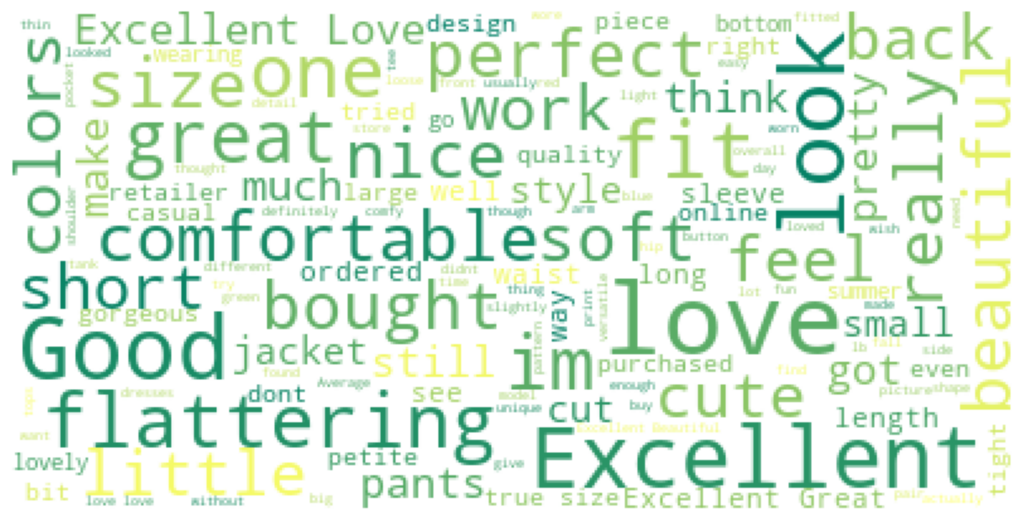

In [116]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

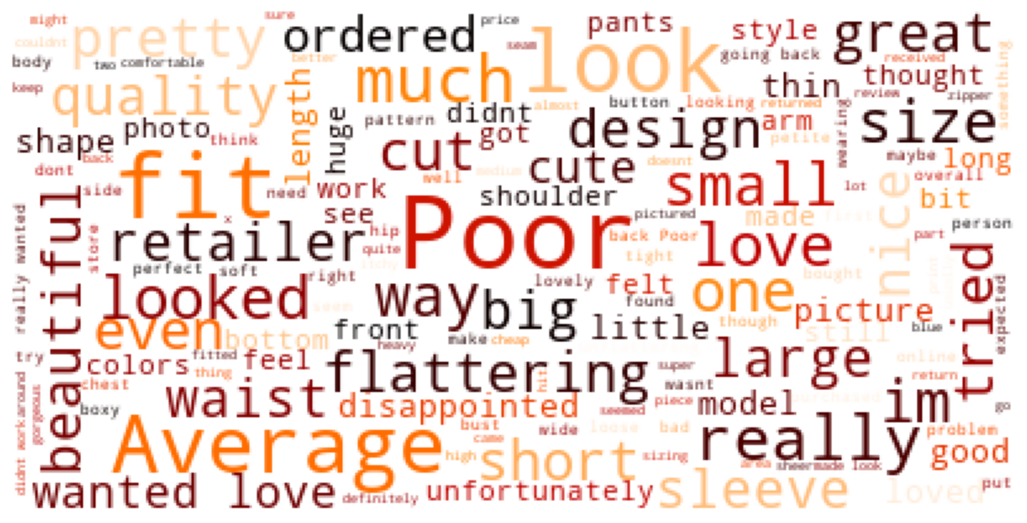

In [117]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
data.sample(3)

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,combined_review,Processed_Review
2081,1087,36,Excellent,1,General Petite,Dresses,Dresses,Excellent The only fall you need The cream in this is divine such a stunning that can be worn with a vest jacket or alone it looks very luxe and expensive in the cream because its a knit can go smaller in size i tried on both the xsmall and small opted to go with the xsmall found it fit better,Excellent fall need cream divine stunning worn vest jacket alone looks luxe expensive cream knit go smaller size tried xsmall small opted go xsmall found fit better
2454,1035,36,Excellent,1,General Petite,Bottoms,Jeans,Excellent My new favorite I cannot say enough excellent things about these jeansthey fit beautifully have just enough stretch and sit high enough on my waist to cover any unsightly rolls this was my first pilcro purchase and i will definitely be adding other styles to my closet in the near future typically im a size 32 or 14 in but i sized down to a 31 in these after the sales associate made that suggestion im so glad i didthey are a perfect fit,Excellent new favorite not say enough excellent things jeansthey fit beautifully enough stretch sit high enough waist cover unsightly rolls first pilcro purchase definitely adding styles closet near future typically im size sized sales associate made suggestion im glad didthey perfect fit
4657,927,43,Average,1,General Petite,Tops,Sweaters,Average Like the swing shape dont like the I got this 25 off before christmas i immediately started wearing it thinking it would be a staple i like the swing shape the shape feels just right not too baggy but the is more washed out looking than the picture reveals collects lint like crazy and out of the box the looks like it has been laundered several times also there is a particularly prominent hole in the chest area as you can see in retailers picture it looks out of place in person im left loving the s,Average Like swing shape dont like got christmas immediately started wearing thinking would staple like swing shape shape feels right not baggy washed looking picture reveals collects lint like crazy box looks like laundered several times also particularly prominent hole chest area see retailers picture looks place person im left loving


In [118]:
datanlp=data.copy()

In [119]:
pickle.dump(datanlp,open("clothdata","wb")) # type: ignore

# Tf-idf model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=8000)
p=tv.fit_transform(corpus).toarray()

In [ ]:
dp=pd.DataFrame(p)
df_all=pd.merge(data,dp, left_index=True, right_index=True )
df_all.head()

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,combined_review,Processed_Review,0,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
0,1080,28,Good,1,General,Dresses,Dresses,Good Adorable but different than pictured Agree with other reviewers that the doesnt look like the picture so retailerpligie should really change it out however im keeping the since it does look cute on definitely more yellow in it than you can see,Good Adorable different pictured Agree reviewers doesnt look like picture retailerpligie really change however im keeping since look cute definitely yellow see,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,875,58,Excellent,1,General Petite,Tops,Knits,Excellent Beautiful lightweight cardigan the sheerness is really pretty ordered one for my sister too,Excellent Beautiful lightweight cardigan sheerness really pretty ordered one sister,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1078,45,Excellent,1,General,Dresses,Dresses,Excellent Cute comfy romper Love this romper once on feels comfy like pjs but looks put together i find bending forward at the waist helps to get it off and on tiny complaint is that the snap shows even when closed that is minor the rest is all good,Excellent Cute comfy romper Love romper feels comfy like pjs looks put together find bending forward waist helps get tiny complaint snap shows even closed minor rest good,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1081,24,Average,1,General,Dresses,Dresses,Average I really like the look of this but i ended up returning it because it was too short the shoulder area was also too big on me,Average really like look ended returning short shoulder area also big,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,965,57,Excellent,1,General,Jackets,Jackets,Excellent Great casual blazer Im not a blazer girl but this one is perfect in the sense that its not overly structured and stiff it is really soft and comfortable but still holds its shape i am planning to it with a tee and or even some leather leggings pilcroi can see this being dressed up for work or church a great piece for your wardrobe i could have taken a small but decided on the medium in case i wore something a little thicker underneath,Excellent Great casual blazer Im not blazer girl one perfect sense not overly structured stiff really soft comfortable still holds shape planning tee even leather leggings pilcroi see dressed work church great piece wardrobe could taken small decided medium case wore something little thicker underneath,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = df_all.drop(['Clothing ID','Recommended','combined_review','Processed_Review','Division Name','Department Name','Class Name','Rating'],axis=1)
y = df_all.Recommended

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled_age=scaler.fit_transform(X_train['Age'].values.reshape(-1,1))

In [ ]:
X_train['Age']=scaled_age

In [ ]:
scaled_agetest=scaler.fit_transform(X_test['Age'].values.reshape(-1,1))

In [ ]:
X_test['Age']=scaled_agetest

In [ ]:
X_train

,Age,0,1,2,3,4,5,6,7,8,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
4508,0.1625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3420,0.3375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.3625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7389,0.1875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7062,0.4750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0.6375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7891,0.4625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,0.4625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


# Training and predicting with different ML models

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_predtrainlr=classifier.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_predtrainlr)
print(cm)
accuracy_score(y_train, y_predtrainlr)

[[3067   42]
 [ 172 3580]]


0.9688092114852063

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[784  21]
 [ 58 853]]


0.953962703962704

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_predr = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predr)
print(cm)
accuracy_score(y_test, y_predr)

[[783  22]
 [105 806]]


0.925990675990676

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_pred= nb.predict(X_test)

In [ ]:
nb_trainpred=nb.predict(X_train)

In [ ]:
accuracy_score(y_train, nb_trainpred)

0.8083369771170383

In [ ]:
cm_nb = confusion_matrix(y_test, nb_pred)
print(cm_nb)
accuracy_score(y_test, nb_pred)

[[669 136]
 [533 378]]


0.6101398601398601

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_trainpred= knn.predict(X_train)a

In [ ]:
accuracy_score(y_train, knn_trainpred)

0.8941845212068211

In [ ]:
knn_pred= knn.predict(X_test)

In [ ]:
cm_knn = confusion_matrix(y_test, knn_pred)
print(cm_knn)
accuracy_score(y_test, knn_pred)

[[656 149]
 [147 764]]


0.8275058275058275

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
svm_trainpred= svm.predict(X_train)

In [ ]:
accuracy_score(y_train, svm_trainpred)

0.9736190059758053

In [ ]:
svm_pred=svm.predict(X_test)

In [ ]:
cm_svm = confusion_matrix(y_test, svm_pred)
print(cm_svm)
accuracy_score(y_test, svm_pred)

[[796   9]
 [ 65 846]]


0.9568764568764568

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=10 ,random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [ ]:
dt_trainpred= dt.predict(X_train)

In [ ]:
accuracy_score(y_train, dt_trainpred)

0.9763882815916047

In [ ]:
dt_pred= dt.predict(X_test)

In [ ]:
cm_dt = confusion_matrix(y_test, dt_pred)
print(cm_dt)
accuracy_score(y_test, dt_pred)

[[794  11]
 [ 64 847]]


0.9562937062937062

# Visualizing and comparing results of models

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

# Compute metrics for each model
results = {
    'Logistic Regression': {},
    'Random Forest': {},
    'Naive Bayes': {},
    'K-Nearest Neighbors': {},
    'Support Vector Machine': {},
    'Decision Tree': {}
}

models_predictions = {
    'Logistic Regression': y_pred,
    'Random Forest': y_predr,
    'Naive Bayes': nb_pred,
    'K-Nearest Neighbors': knn_pred,
    'Support Vector Machine': svm_pred,
    'Decision Tree': dt_pred
}

for model, y_pred in models_predictions.items():
    for metric_name, metric_func in metrics.items():
        results[model][metric_name] = metric_func(y_test, y_pred)

# Convert results to a format suitable for Plotly
metric_names = list(metrics.keys())
model_names = list(results.keys())
data = {
    metric: [results[model][metric] for model in model_names]
    for metric in metric_names
}

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio


# Create a figure with initial data
fig = go.Figure()
# Create initial bar plot with the 'sunset' colorscale
initial_metric = 'Accuracy'
fig.add_trace(go.Bar(
    x=model_names,
    y=data[initial_metric],
    name=initial_metric,
    marker=dict(
        color=data[initial_metric],
        colorscale='sunset'
    )
))
fig.update_layout(
    title=f'Model Comparison by {initial_metric}',
    xaxis_title='Models',
    yaxis_title=initial_metric,
    updatemenus=[
        {
            "buttons": [
                {
                    "label": metric,
                    "method": "update",
                    "args": [
                        {"y": [data[metric]]},
                        {
                            "title": f"Model Comparison by {metric}",
                            "yaxis": {"title": metric},
                            "marker": dict(color=data[metric], colorscale='sunset')
                        }
                    ]
                } for metric in metric_names
            ],
            "direction": "down",
            "showactive": True
        }
    ]
)

fig.show()

In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def predict_recommendation():
    """
    This function interacts with the user to input review text and age,
    and predicts whether the review is recommended or not recommended.

    Returns:
        A string "Recommended" or "Not Recommended" based on the prediction.
    """
    # Input from user
    review = input("Enter your review: ")
    age = float(input("Enter your age: "))

    # Preprocess the review text
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in fin_stop]
    review = ' '.join(review)

    # Convert the review text into a TF-IDF vector
    review_vector = tv.transform([review])

    # Scale the age
    scaled_age = scaler.transform([[age]])

    # Reshape scaled_age to match the expected format for concatenation
    scaled_age = scaled_age.flatten()

    # Combine the review vector and age into a single feature vector
    feature_vector = np.concatenate((review_vector.toarray()[0], scaled_age), axis=0)

    # Make a prediction using the Logistic Regression model
    prediction = classifier.predict([feature_vector])

    # Return the predicted class
    if prediction[0] == 1:
        return "Product: Recommended"
    else:
        return "Product: Not Recommended"

# Example usage
print(predict_recommendation())

Enter your review: The dress was not comfortable to wear
Enter your age: 32
Product: Not Recommended


# Checking how does 'Age' feature contribute to our model performance

In [ ]:
df_all.head()

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,combined_review,Processed_Review,0,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
0,1080,28,Good,1,General,Dresses,Dresses,Good Adorable but different than pictured Agree with other reviewers that the doesnt look like the picture so retailerpligie should really change it out however im keeping the since it does look cute on definitely more yellow in it than you can see,Good Adorable different pictured Agree reviewers doesnt look like picture retailerpligie really change however im keeping since look cute definitely yellow see,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,875,58,Excellent,1,General Petite,Tops,Knits,Excellent Beautiful lightweight cardigan the sheerness is really pretty ordered one for my sister too,Excellent Beautiful lightweight cardigan sheerness really pretty ordered one sister,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1078,45,Excellent,1,General,Dresses,Dresses,Excellent Cute comfy romper Love this romper once on feels comfy like pjs but looks put together i find bending forward at the waist helps to get it off and on tiny complaint is that the snap shows even when closed that is minor the rest is all good,Excellent Cute comfy romper Love romper feels comfy like pjs looks put together find bending forward waist helps get tiny complaint snap shows even closed minor rest good,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1081,24,Average,1,General,Dresses,Dresses,Average I really like the look of this but i ended up returning it because it was too short the shoulder area was also too big on me,Average really like look ended returning short shoulder area also big,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,965,57,Excellent,1,General,Jackets,Jackets,Excellent Great casual blazer Im not a blazer girl but this one is perfect in the sense that its not overly structured and stiff it is really soft and comfortable but still holds its shape i am planning to it with a tee and or even some leather leggings pilcroi can see this being dressed up for work or church a great piece for your wardrobe i could have taken a small but decided on the medium in case i wore something a little thicker underneath,Excellent Great casual blazer Im not blazer girl one perfect sense not overly structured stiff really soft comfortable still holds shape planning tee even leather leggings pilcroi see dressed work church great piece wardrobe could taken small decided medium case wore something little thicker underneath,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

features_with_age = df_all.drop(columns=['Recommended', 'Clothing ID','Rating','Recommended'	, 'Division Name',	'Department Name','Class Name','combined_review'	,'Processed_Review'])  # Include all features
features_without_age = features_with_age.drop(columns=['Age'])  # Exclude Age
target = df_all['Recommended']

X_train_with_age, X_test_with_age, y_train, y_test = train_test_split(features_with_age, target, test_size=0.2, random_state=42)
X_train_without_age, X_test_without_age, _, _ = train_test_split(features_without_age, target, test_size=0.2, random_state=42)


In [ ]:
# Convert all feature names to strings
X_train_with_age.columns = X_train_with_age.columns.astype(str)
X_test_with_age.columns = X_test_with_age.columns.astype(str)
X_train_without_age.columns = X_train_without_age.columns.astype(str)
X_test_without_age.columns = X_test_without_age.columns.astype(str)


In [ ]:
# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian NB': GaussianNB()
}

# Store results
results_with_age = {}
results_without_age = {}

# Ensure feature names are strings
X_train_with_age.columns = X_train_with_age.columns.astype(str)
X_test_with_age.columns = X_test_with_age.columns.astype(str)
X_train_without_age.columns = X_train_without_age.columns.astype(str)
X_test_without_age.columns = X_test_without_age.columns.astype(str)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1 Score': f1_score(y_test, predictions)
    }

# Evaluate all models
for model_name, model in models.items():
    results_with_age[model_name] = evaluate_model(model, X_train_with_age, X_test_with_age, y_train, y_test)
    results_without_age[model_name] = evaluate_model(model, X_train_without_age, X_test_without_age, y_train, y_test)

metrics = list(results_with_age['Logistic Regression'].keys())
models_list = list(models.keys())

# Extract scores for each metric and model
data_with_age = {metric: [results_with_age[model][metric] for model in models_list] for metric in metrics}
data_without_age = {metric: [results_without_age[model][metric] for model in models_list] for metric in metrics}

fig = go.Figure()

initial_metric = 'Accuracy'
fig.add_trace(go.Bar(
    x=models_list,
    y=data_with_age[initial_metric],
    name=f'{initial_metric} with Age',
    marker_color='rgb(255, 127, 14)'
))

fig.add_trace(go.Bar(
    x=models_list,
    y=data_without_age[initial_metric],
    name=f'{initial_metric} without Age',
    marker_color='rgb(44, 160, 44)'
))

# Add dropdown for selecting metrics
fig.update_layout(
    title=f'Model Comparison by {initial_metric}',
    xaxis_title='Models',
    yaxis_title=initial_metric,
    barmode='group',
    updatemenus=[
        {
            "buttons": [
                {
                    "label": metric,
                    "method": "update",
                    "args": [
                        {"y": [data_with_age[metric], data_without_age[metric]]},
                        {"title": f'Model Comparison by {metric}', "yaxis": {"title": metric}}
                    ]
                }
                for metric in metrics
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig.update_layout(
    template='plotly_dark'
)

fig.show()

**Conclusion**: Having Age feature does not cause a significant improvement in model performance in most cases, so it could be dropped.